## Boundary Value Problem - Laplace Equation in 2D:
$$\nabla^2\Phi = 0$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1. A square box of $1m\times1m$ with $V = 1V$ at the top edge  and $V = 0V$ at other edges

In [3]:
N = 100
V = 1.0
tol = 1e-6
phi = np.zeros((N+1,N+1),float)

# Apply boundary condition: Top edge is at V volts
phi[0,:] = V

delta = 10.0
omega = 0.91
n = 0
while delta > tol:
    n += 1
    delta = 0.0
    # i iterates over rows(or different y values)
    # i and j goes from 1->N-1 so that boundary points are unchanged
    for i in range(1,N):
        for j in range(1,N):
            deltaprime = phi[i,j]
            phi[i,j] = ((1+omega)/4)*(phi[i-1,j]+phi[i,j-1]+phi[i+1,j]+phi[i,j+1])-omega*phi[i,j]
            deltaprime = abs(phi[i,j]-deltaprime)
            if delta < deltaprime:
                delta = deltaprime;


Number of iterations =  373


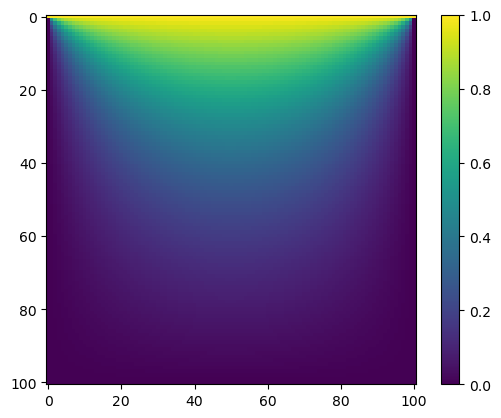

[[-0.5  -0.49 -0.48 ...  0.48  0.49  0.5 ]
 [-0.5  -0.49 -0.48 ...  0.48  0.49  0.5 ]
 [-0.5  -0.49 -0.48 ...  0.48  0.49  0.5 ]
 ...
 [-0.5  -0.49 -0.48 ...  0.48  0.49  0.5 ]
 [-0.5  -0.49 -0.48 ...  0.48  0.49  0.5 ]
 [-0.5  -0.49 -0.48 ...  0.48  0.49  0.5 ]] 
 [[-0.5  -0.5  -0.5  ... -0.5  -0.5  -0.5 ]
 [-0.49 -0.49 -0.49 ... -0.49 -0.49 -0.49]
 [-0.48 -0.48 -0.48 ... -0.48 -0.48 -0.48]
 ...
 [ 0.48  0.48  0.48 ...  0.48  0.48  0.48]
 [ 0.49  0.49  0.49 ...  0.49  0.49  0.49]
 [ 0.5   0.5   0.5  ...  0.5   0.5   0.5 ]]


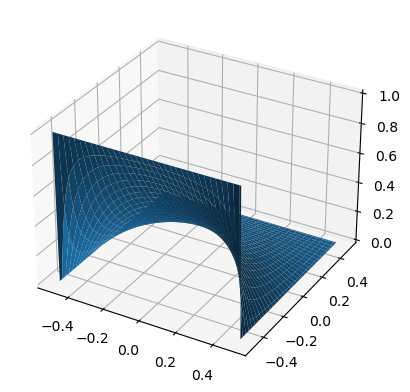

In [4]:
print('Number of iterations = ',n)
plt.imshow(phi)
plt.colorbar()
plt.show()

ax = plt.axes(projection = '3d')
x = np.linspace(-0.5,0.5,N+1)
y = np.linspace(-0.5,0.5,N+1)
X,Y = np.meshgrid(x,y)
print(X,'\n',Y)
ax.plot_surface(X,Y,phi)

plt.show()



### 2. Capacitor plates at $\pm1V$ potential in a grounded metal box of sides $10\ cm$

In [5]:
N = 35
V = 1.0
tol = 1e-6

phi = np.zeros((N+1,N+1),float)

L = 50.0;xplate1 = 15.0;xplate2 = 35.0;
yplatemin1 = 15.0;yplatemin2 = 15.0
yplatemax1 = 35.0;yplatemax2 = 35.0

iplate1 = int(xplate1*N/L);iplate2 = int(xplate2*N/L)
jplatemin1 = int(yplatemin1*N/L);jplatemin2 = int(yplatemin2*N/L)
jplatemax1 = int(yplatemax1*N/L);jplatemax2 = int(yplatemax2*N/L)
# Setting the potential at the location of capacitor plates
phi[jplatemin1:jplatemax1+1,iplate1] = 1.0
phi[jplatemin2:jplatemax2+1,iplate2] = -1.0

delta = 10.0
omega = 0.91
n = 0
while delta > tol:
    delta = 0
    n += 1
    for i in range(N+1):
        for j in range(N+1):
            if i==0 or i==N or j==0 or j==N or (j==iplate1 and jplatemin1<=i and i<=jplatemax1) or (j==iplate2 and jplatemin2<=i and i<=jplatemax2):
                phi[i,j] = phi[i,j]
            else:
                deltaprime = phi[i,j]
                phi[i,j] = ((1+omega)/4)*(phi[i-1,j]+phi[i,j-1]+phi[i+1,j]+phi[i,j+1])-omega*phi[i,j]
                deltaprime = abs(phi[i,j] - deltaprime)
                if delta < deltaprime:
                    delta = deltaprime
                    


10


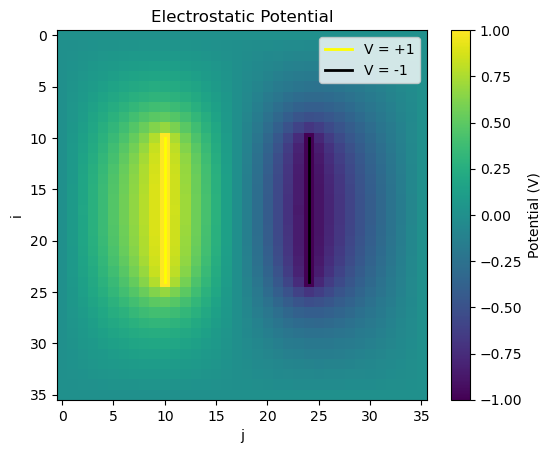

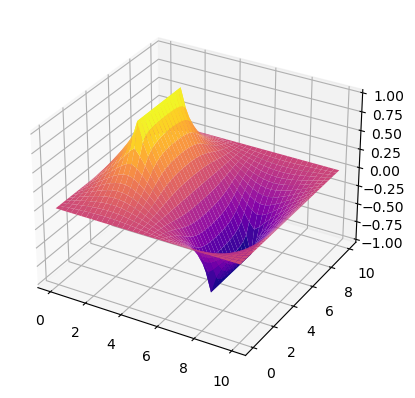

In [6]:
plt.imshow(phi)#cmap='seismic', vmin=-1, vmax=1)
plt.colorbar(label='Potential (V)')
plt.title('Electrostatic Potential')

# Overlaying the capacitor plates
# Note: plot(x, y), so we switch indices accordingly
plate_i = np.arange(jplatemin1, jplatemax1+1)

# Positive plate at j=20
plt.plot([iplate1]*len(plate_i), plate_i, color='yellow', linewidth=2, label='V = +1')

# Negative plate at j=80
plt.plot([iplate2]*len(plate_i), plate_i, color='black', linewidth=2, label='V = -1')

plt.legend()
plt.xlabel('j')
plt.ylabel('i')
plt.show()

ax = plt.axes(projection = '3d')
x = np.linspace(0,10,N+1)
y = np.linspace(0,10,N+1)
X,Y = np.meshgrid(x,y)
ax.plot_surface(X,Y,phi,cmap = 'plasma')

plt.show() 

#### Electric Field between the plates:
$$\vec{E} = -\vec{\nabla} \Phi$$

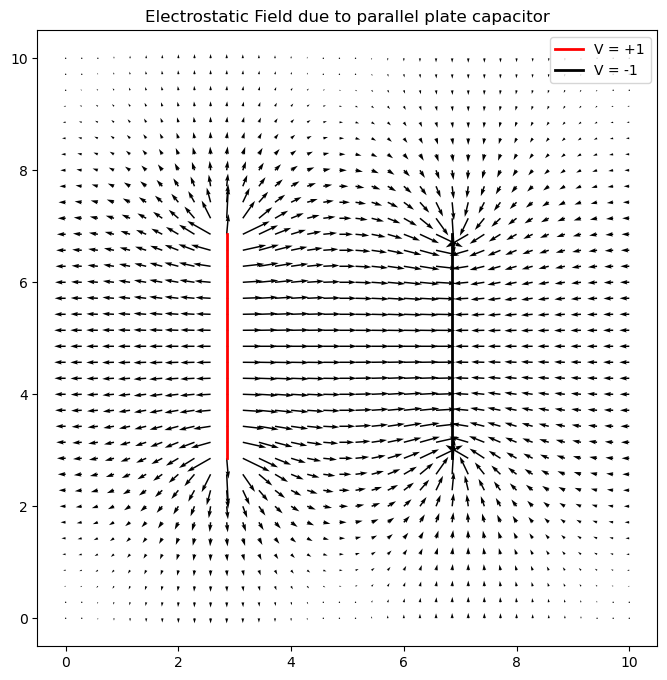

In [7]:
Ey,Ex = np.gradient(-phi)
plt.figure(figsize = (8,8))
# Overlaying the capacitor plates
# Note: plot(x, y), so we switch indices accordingly
plate_i = np.arange(jplatemin1, jplatemax1+1)*10/N

# Positive plate at j=20
plt.plot([iplate1*10/N]*len(plate_i), plate_i, color='red',linewidth=2, label='V = +1')

# Negative plate at j=80
plt.plot([iplate2*10/N]*len(plate_i), plate_i, color='black', linewidth=2, label='V = -1')

plt.legend()
plt.title('Electrostatic Field due to parallel plate capacitor')
plt.quiver(X,Y,Ex,Ey)
#plt.savefig('Field due to parallel plate capacitor.jpg',bbox_inches = 'tight')